# Data Bias Analysis

The OASIS dataset is the best dataset I can get for MRI scans with patients who have Alzheimer's disease.
It is however slightly bias, some information given to the machine learning algorithm for training may allow for bias.
Here I hope to identify where it may be bias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data
df = pd.read_csv('OASIS_cross-sectional.csv')

# Check the data
df.head()


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


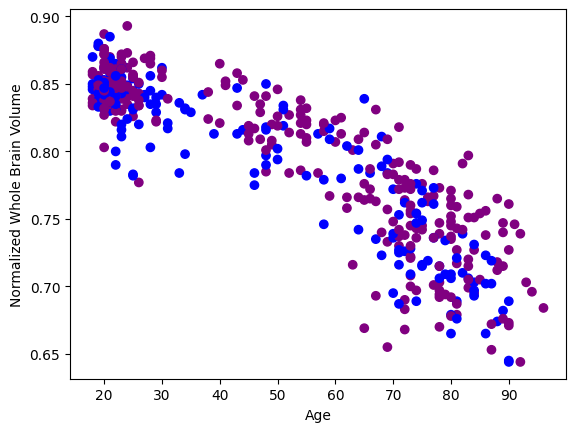

In [3]:
# Creating a scatter graph of the ages and the nWBV (normalized whole brain volume)

# Set the colour of the points to blue or pink based off gender
colors = np.where(df['M/F'] == 'F', 'purple', 'blue')
plt.scatter(df['Age'], df['nWBV'], c=colors)
plt.xlabel('Age')
plt.ylabel('Normalized Whole Brain Volume')

plt.show()

# Potential Problems Here

Giving the age of the patient to the machine learning algorithm may allow for bias, this is because there are very few patients who are young and have Alzheimer's disease, in the dataset.
This also means it would likely be problematic to give the normalized whole brain volume to the machine learning algorithm, as this is likely to be highly correlated with age, and will therefore allow for bias.

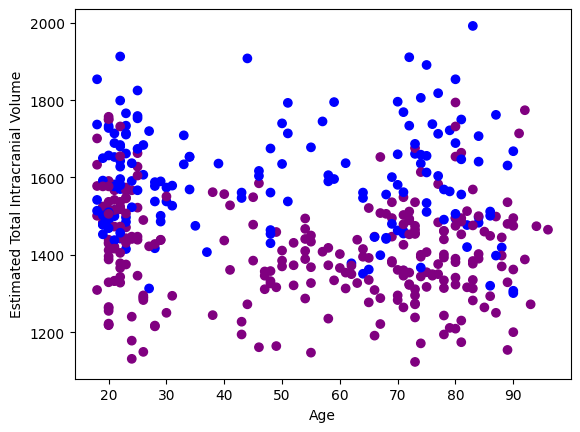

In [4]:
# Creating a scatter graph of the ages and the eTIV (Estimated Total Intracranial Volume)

plt.scatter(df['Age'], df['eTIV'], c=colors)
plt.xlabel('Age')
plt.ylabel('Estimated Total Intracranial Volume')
plt.show()

# ETIV (Estimated Total Intracranial Volume) and Age
This scatter graph is significantly more random than the one for age and whole brain volume, which means it is likely better to give to the machine learning algorithm, as it shouldn't give any strong indication of the age of the patient, and it should be useful for the machine learning algorithm.

One potential issue with this parameter is that women are more likely to have Alzheimer's disease, and this graph shows how the men and women are separated, which may allow for bias based off of the gender of the patient.

In [5]:
# Not all of the data in the CSV is present, so we need to identify which rows are missing data

# Check for missing data
df.isnull().sum()

# Print the number of rows with missing data or N/A
print('Number of rows with missing data or N/A: ', df.isnull().sum().sum())

Number of rows with missing data or N/A:  1239


In [6]:
# Identify columns with missing data
df.columns[df.isnull().any()]


Index(['Educ', 'SES', 'MMSE', 'CDR', 'Delay'], dtype='object')

In [7]:
#Print out the MMSE and the ID of the rows
df[['ID', 'MMSE']]

,ID,MMSE
0,OAS1_0001_MR1,29.0
1,OAS1_0002_MR1,29.0
2,OAS1_0003_MR1,27.0
3,OAS1_0004_MR1,NaN
4,OAS1_0005_MR1,NaN
...,...,...
431,OAS1_0285_MR2,NaN
432,OAS1_0353_MR2,NaN
433,OAS1_0368_MR2,NaN
434,OAS1_0379_MR2,NaN


# The MMSE (Mini Mental State Examination) Score

The MMSE score is a test that is given to patients to determine how severe their Alzheimer's disease is.
With the OASIS dataset, the MMSE score ranges from 30 (least demented) to 0 (most demented) and the most demented patient included in this dataset had a score of 14.

Anything above a 25 is non demented.

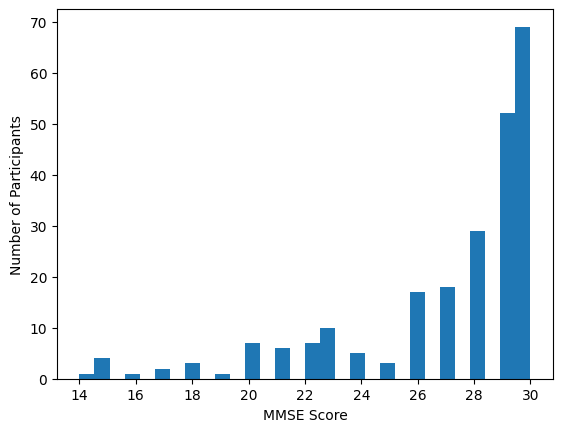

In [19]:
# Graph the MMSE scores
data = df[['MMSE']].sort_values(by=['MMSE'])
plt.hist(data, bins=30)
plt.xlabel('MMSE Score')
plt.ylabel('Number of Participants')
plt.show()



In [20]:
# Print all the unique values of CDR
df['CDR'].unique().astype(str)

array(['0.0', '0.5', 'nan', '1.0', '2.0'], dtype='<U32')